In [112]:
import pandas as pd
import os
import shutil

metrics = os.listdir()
for dir in ["json_results","figures","excel"]:
    if not os.path.exists(dir):
        os.mkdir(dir)
raw = ""
dict_file = []
for f in metrics:
    if f.endswith(".txt"):
        with open(f, 'r') as file:
            filedata = file.read()
            filedata = filedata.replace("\'","\"")
            with open(os.path.join("json_results",f.split(".txt")[0]+".json"),'w') as fp:                
                dict_file.append(fp.name)
                fp.write(filedata)
        # shutil.move(f,os.path.join("txt_results",f))

In [146]:
import matplotlib.pyplot as plt
import json
dict_file = os.listdir("json_results")
df_list = []
for d in dict_file:
    data = json.load(open(os.path.join("json_results", d)))
    data["nw_metric"] = d.split('.')[0]
    df_list.append(data)

df = pd.DataFrame(df_list)
df.index = df["nw_metric"]
df = df.drop('nw_metric', axis=1)

df = df.sort_index(ascending=True)

df.to_excel(os.path.join(
    "excel", "runtime_metrics_partition_0.xlsx"), index=True)


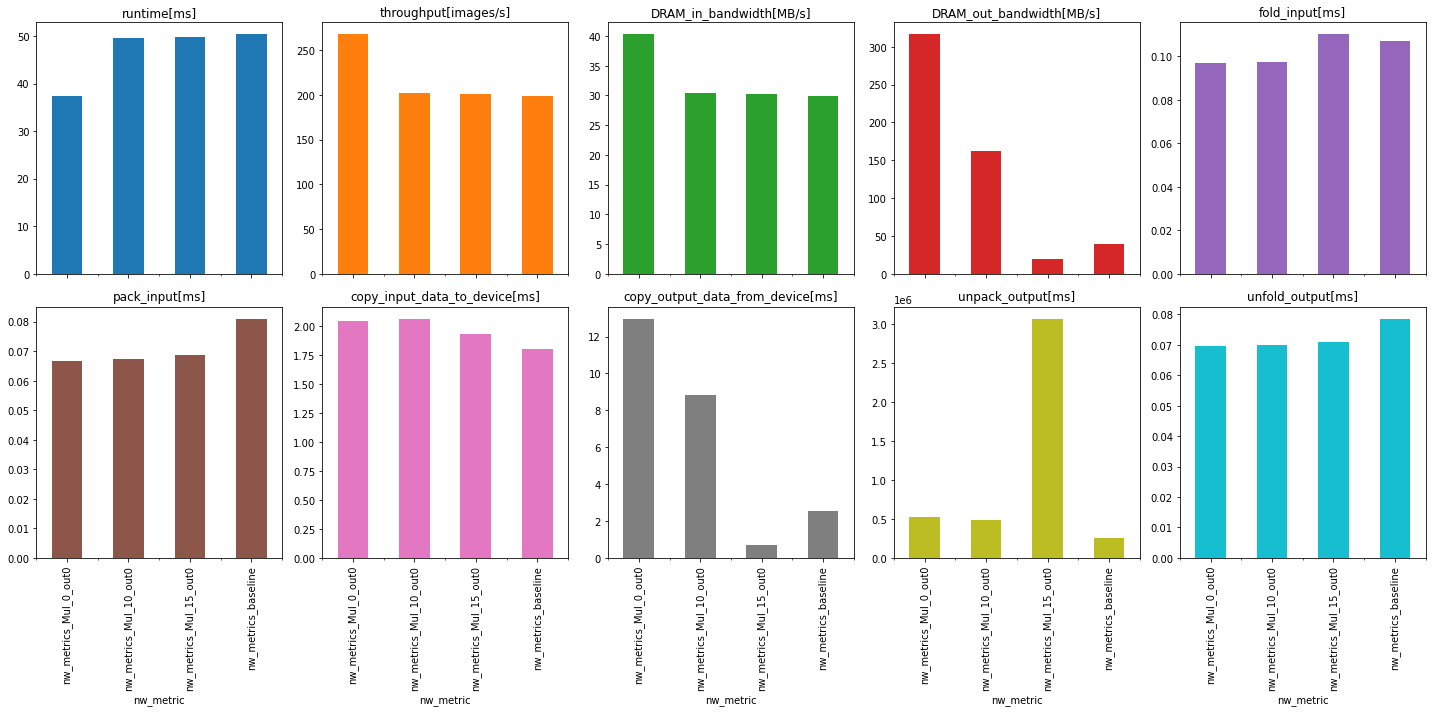

In [162]:
dfplot = df.drop(["fclk[mhz]","batch_size"],axis=1)
dfplot.plot(kind="bar",subplots=True,sharex=True,layout=[2,5],legend=False,figsize=(20,10))
plt.subplots_adjust(wspace=0.5,hspace=0.30)
plt.tight_layout()
plt.savefig(os.path.join("figures","compare_graph_size.png"),dpi = 300, facecolor  = 'w')
plt.show()